In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets.mnist import load_data
# ( (訓練資料, 訓練資料答案), (測試資料, 測試資料答案))
((x_train, y_train), (x_test, y_test)) = load_data()

Using TensorFlow backend.


In [2]:
print("訓練資料有幾筆呢?", x_train.shape)
print("測試資料有幾筆呢?", x_test.shape)

訓練資料有幾筆呢? (60000, 28, 28)
測試資料有幾筆呢? (10000, 28, 28)


In [3]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


這個數字是: 8


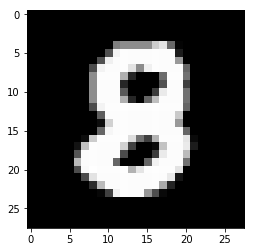

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 59999)
print("這個數字是:", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [5]:
# 資料預處理
# 圖片: 攤開(MLP只能接受一維) -> 標準化(0 - 1)
x_train_reshape = x_train.reshape(60000, 784) / 255
x_test_reshape = x_test.reshape(10000, 784) / 255
# 特徵: 把你的特徵變成每一個輸出神經元都要一個值(One-Hot)
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

In [6]:
print("秀一筆", y_train[0] , "給你看", y_train_cat[0])

秀一筆 5 給你看 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# 建立模型(第一種最簡單: Sequential(蛋糕))
from keras.models import Sequential
# 全連結層
from keras.layers import Dense
mlp = Sequential()
# 第一個層: 手動設定輸入的大小 #Param: 784 * 128 + 128
mlp.add(Dense(input_dim=784, units=128, activation="relu"))
# units=1:sigmoid, units>=2:softmax
mlp.add(Dense(units=10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 確定模型
# loss:二元(binary_crossentropy)多元(categorical_crossentropy)
mlp.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
# 訓練
# batch: 問幾個人才開始走(100-200)
# epochs: 你的每一筆資料總共要閱讀幾次
# 幾次梯度更新: 60000 * 10 / 200
# verbose: 輸入log的等級
train_history = mlp.fit(x = x_train_reshape, 
                        y = y_train_cat, 
                        validation_split=0.1, 
                        batch_size=200, 
                        epochs=15, 
                        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.4334 - acc: 0.8787 - val_loss: 0.1941 - val_acc: 0.9477
Epoch 2/15
 - 1s - loss: 0.2027 - acc: 0.9430 - val_loss: 0.1444 - val_acc: 0.9605
Epoch 3/15
 - 1s - loss: 0.1497 - acc: 0.9579 - val_loss: 0.1156 - val_acc: 0.9687
Epoch 4/15
 - 1s - loss: 0.1169 - acc: 0.9670 - val_loss: 0.1044 - val_acc: 0.9713
Epoch 5/15
 - 1s - loss: 0.0959 - acc: 0.9731 - val_loss: 0.0947 - val_acc: 0.9740
Epoch 6/15
 - 1s - loss: 0.0807 - acc: 0.9770 - val_loss: 0.0892 - val_acc: 0.9743
Epoch 7/15
 - 1s - loss: 0.0676 - acc: 0.9812 - val_loss: 0.0923 - val_acc: 0.9740
Epoch 8/15
 - 1s - loss: 0.0594 - acc: 0.9832 - val_loss: 0.0873 - val_acc: 0.9762
Epoch 9/15
 - 1s - loss: 0.0513 - acc: 0.9861 - val_loss: 0.0776 - val_acc: 0.9778
Epoch 10/15
 - 1s - loss: 0.0446 - acc: 0.9880 - val_loss: 0.0788 - val_acc: 0.9780
Epoch 11/15
 - 1s - loss: 0.0391 - acc: 0.9895 - val_loss: 0.0765 - val_acc: 0.9778
Epoch 12/15
 - 1s - loss: 0.0338 - a

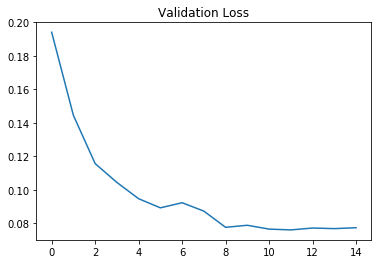

In [10]:
y = train_history.history["val_loss"]
plt.title("Validation Loss")
plt.plot(y)

In [12]:
print("預測:", mlp.predict_classes(x_test_reshape))
print("[Loss, Accuracy]", mlp.evaluate(x_test_reshape, y_test_cat))

預測: [7 2 1 ... 4 5 6]
10000/10000 [==============================] - 0s 25us/step
[Loss, Accuracy] [0.06990750216890593, 0.9788]


In [15]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, mlp.predict_classes(x_test_reshape)))

,0,1,2,3,4,5,6,7,8,9
0,970,0,0,0,1,1,4,1,3,0
1,0,1123,3,2,0,0,2,0,5,0
2,3,1,1000,3,2,0,5,5,12,1
3,0,0,2,991,0,4,2,3,4,4
4,0,0,4,1,963,0,4,1,0,9
5,3,0,0,12,0,867,3,1,5,1
6,5,3,0,1,2,4,939,0,4,0
7,0,4,8,4,1,0,0,1006,1,4
8,2,0,2,4,3,1,3,3,955,1
9,1,3,0,9,9,3,1,7,2,974


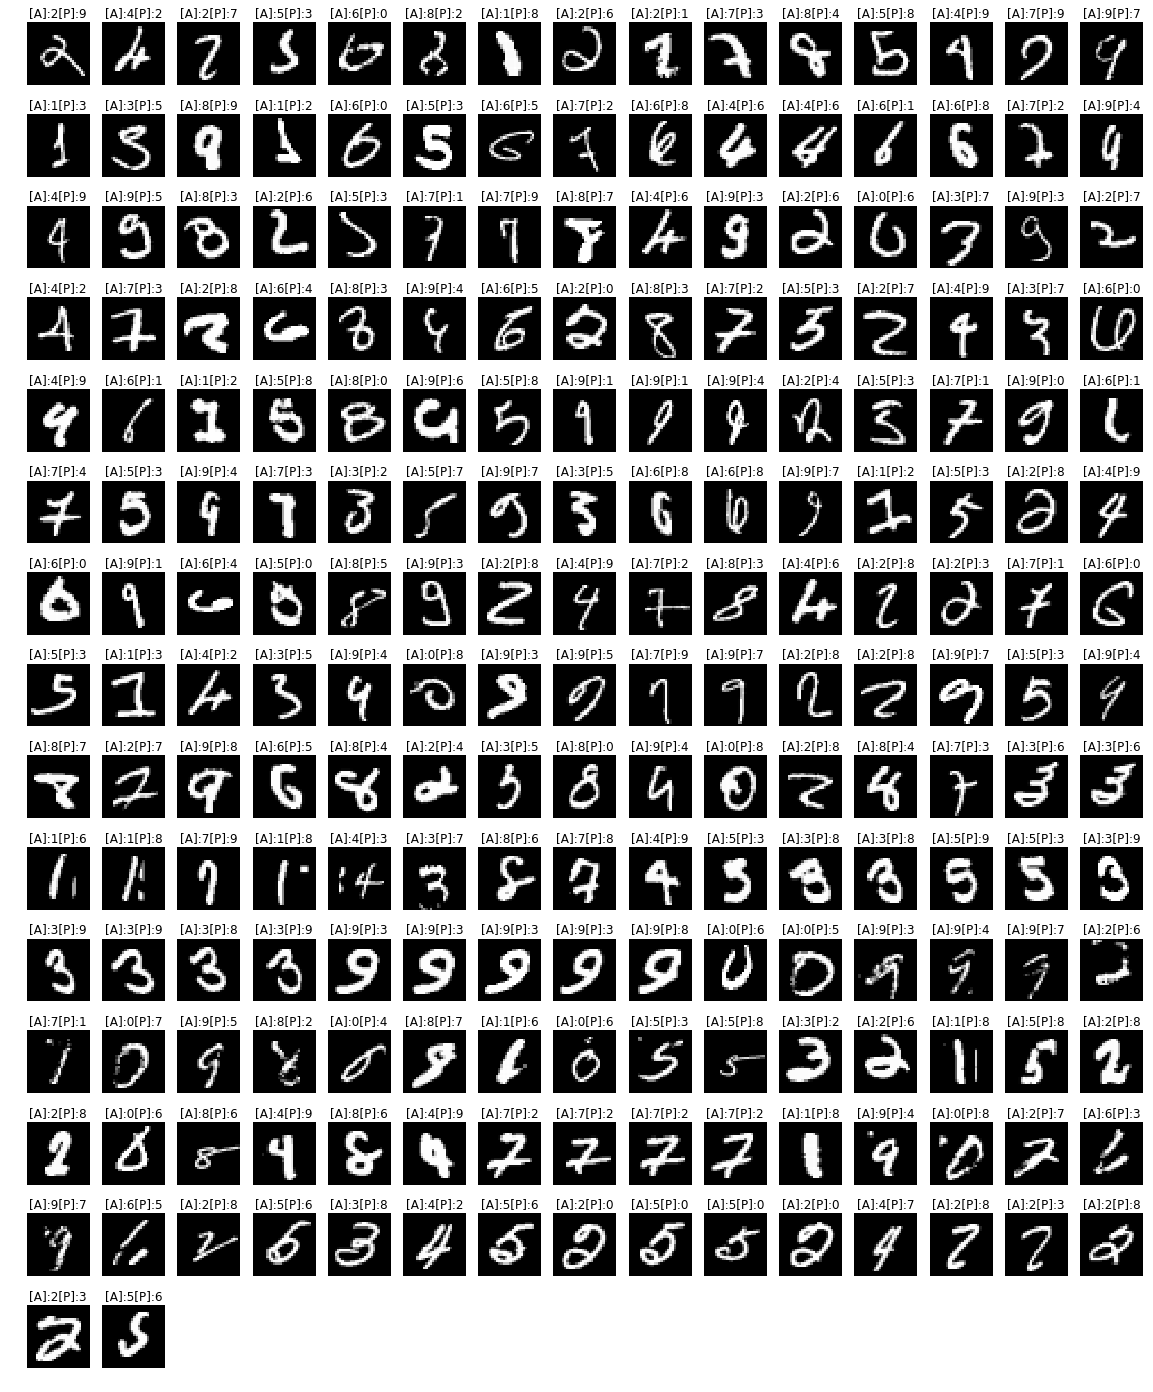

In [60]:
pre = mlp.predict_classes(x_test_reshape)
index_list = []
for (index, answer) in enumerate(y_test):
    if not answer == pre[index]:
        # 把不同的index記錄下來
        index_list.append(index)
# 準備你大圖的大小
plt.figure(figsize=(20, 25))
for (index, i) in enumerate(index_list):
    # 把大圖切成len(index_list) // 15 + 1列 * 15行
    # 取得第index + 1的小圖
    plt.subplot(len(index_list) // 15 + 1, 15, index + 1)
    t = "[A]:" + str(y_test[i]) + "[P]:" + str(pre[i])
    # 設定標題
    plt.title(t)
    # 把軸標籤去掉
    plt.axis("off")
    # 做圖
    plt.imshow(x_test[i], cmap="gray")
    